In [1]:
import random
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
#定义语法内容
grammar = """
sentence = adj noun verb adj noun2
adj = adj_single 和 adj_single 的 | null
adj_single = 漂亮  | 蓝色 | 好看
adv = 安静地 | 静静地
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着 
noun2 = 桌子 | 皮球 
"""

In [40]:
print (grammar)


sentence = adj noun verb adj noun2
adj = adj_single 和 adj_single 的 | null
adj_single = 漂亮  | 蓝色 | 好看
adv = 安静地 | 静静地
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着 
noun2 = 桌子 | 皮球 



In [41]:
# 转化成为字典类型 key值分别为 sentence ,adj,adj,single , adv,noun ,verb,noun2

#1.去掉换行，转化为list 

grammar = grammar.split('\n')


#2.通过'=',转化为list 里面不同key的字典


['', 'sentence = adj noun verb adj noun2', 'adj = adj_single 和 adj_single 的 | null', 'adj_single = 漂亮  | 蓝色 | 好看', 'adv = 安静地 | 静静地', 'noun = 猫 | 女人 | 男人', 'verb = adv 看着 | adv 坐着 ', 'noun2 = 桌子 | 皮球 ', '']


In [171]:
grammar_pattern = {};

for arr in grammar :
    if  not arr : continue
    key ,value = arr.split('=')
    
    #key去掉空格，value去掉'/'
    grammar_pattern[key.strip()] = [e.split() for e in value.split('|')]

#     print ('key = {},value = {}'.format(key,value))
#     print(arr.split('='))
    
print(grammar_pattern)


{'sentence': [['adj', 'noun', 'verb', 'adj', 'noun2']], 'adj': [['adj_single', '和', 'adj_single', '的'], ['null']], 'adj_single': [['漂亮'], ['蓝色'], ['好看']], 'adv': [['安静地'], ['静静地']], 'noun': [['猫'], ['女人'], ['男人']], 'verb': [['adv', '看着'], ['adv', '坐着']], 'noun2': [['桌子'], ['皮球']]}


In [185]:

def getSentence(grammar_pattern, key):
    
   
   if key not in grammar_pattern :
        
#      print ('key {}'.format)   
    return key
   
   expr = random.choice(grammar_pattern[key])

   print('expr = {}'.format(expr))

#    for e in expr :
        
#        print(grammar_pattern[e])
    
#        tokens = getSentence(grammar_pattern,e)
#        print (tokens)
   
#    for e  in expr :
        
#        print(getSentence(grammar_pattern,e))
    
   tokens = [getSentence(grammar_pattern,e) for e in expr]
#    print ('tokens = {}'.format(tokens))
    
   return ''.join([t for t in tokens if t != 'null'])
        

# print (grammar_pattern['sentence'])


In [186]:
getSentence(grammar_pattern,'sentence')

expr = ['adj', 'noun', 'verb', 'adj', 'noun2']
expr = ['null']
expr = ['猫']
expr = ['adv', '坐着']
expr = ['静静地']
expr = ['adj_single', '和', 'adj_single', '的']
expr = ['蓝色']
expr = ['蓝色']
expr = ['皮球']


'猫静静地坐着蓝色和蓝色的皮球'

In [ ]:
# BFS

In [10]:
#定义一个无向图
graph = {
    'A' :'B B B C', 
    'B' : 'A C', 
    'C' : 'A B D E',
    'D' : 'C',
    'E' : 'C F',
    'F' : 'E'
}

In [11]:
#首选去重使用set , 遍历，使用set

for key in graph:
    
     graph[key] = set(graph[key].split())
    

print(graph)

{'A': {'C', 'B'}, 'B': {'A', 'C'}, 'C': {'A', 'E', 'D', 'B'}, 'D': {'C'}, 'E': {'C', 'F'}, 'F': {'E'}}


In [13]:
# 广度优先， 需要定义两个全局变量 已经查看的元素集合seen ,和待查看的元素结合need_check ,每次通过当前查看的结点，拿到其后面的连接点，加到need_check
#当前结点 key
#判断流程 是否已经查看过，每次都是取出需要查看need_check中第一个 使用pop(0),拿到当前结点，定义为current_node
#结束条件 need_check已经为0了

seen= set()
need_check = ['A']

while need_check :
    current_node = need_check.pop(0)
    
  
    if current_node in seen : 
                      print ('{} 改结点已经查看过了'.format(current_node))  
                      continue
                     
    print('{} 正在查看当前结点 '.format(current_node))
   
    need_check += graph[current_node]
    
    seen.add(current_node)
#     print('需要查看的结点 {}'.format(need_check))
#     print ('已经查看过的 {}'.format(seen))
    
    



A 正在查看当前结点 
C 正在查看当前结点 
B 正在查看当前结点 
A 改结点已经查看过了
E 正在查看当前结点 
D 正在查看当前结点 
B 改结点已经查看过了
A 改结点已经查看过了
C 改结点已经查看过了
C 改结点已经查看过了
F 正在查看当前结点 
C 改结点已经查看过了
E 改结点已经查看过了


In [14]:
#深度优先，是将 广度优先的 need_check += graph[current_node]  先查看新加入的点，后查看之前的加入的点



In [20]:
# 深度优先，和广度优先的通解  已需要查看的集合的点 与 新发现的需要查看的点， 哪个放到前面的问题  将这个行为封装成一个函数，作为参数传入

def breadthFirst(new_find,need_seen):
    
    return  need_seen + new_find 


def depthFirst(new_find,need_seen):
    
    return  new_find + need_seen


def search (graph , concat_function):
    
    seen = set()
    need_seen = ['1']
    
    while (need_seen):
        #当前结点
        current_node = need_seen.pop(0)
        
        if current_node in seen:
            print ('{} has been seen'.format(current_node))
            continue
            
         
        print ('looking for {} '.format(current_node))
        new_find = graph[current_node]
        
        need_seen = concat_function(new_find,need_seen)
        
        seen.add(current_node)
           
    

In [21]:
#定义无向长图
graph_long = {
    '1': '2 7',
    '2': '3', 
    '3': '4', 
    '4': '5', 
    '5': '6 10', 
    '7': '8',
    '6': '5',
    '8': '9',
    '9': '10', 
    '10': '5 11', 
    '11': '12',
    '12': '11',
}

for n in graph_long :    graph_long[n] = graph_long[n].split()

In [22]:
print (graph_long)

{'1': ['2', '7'], '2': ['3'], '3': ['4'], '4': ['5'], '5': ['6', '10'], '7': ['8'], '6': ['5'], '8': ['9'], '9': ['10'], '10': ['5', '11'], '11': ['12'], '12': ['11']}


In [19]:
search(graph_long,depthFirst)


looking for 1 
looking for 2 
looking for 3 
looking for 4 
looking for 5 
looking for 6 
5 has been seen
looking for 10 
5 has been seen
looking for 11 
looking for 12 
11 has been seen
looking for 7 
looking for 8 
looking for 9 
10 has been seen


In [23]:
search(graph_long,breadthFirst)

looking for 1 
looking for 2 
looking for 7 
looking for 3 
looking for 8 
looking for 4 
looking for 9 
looking for 5 
looking for 10 
looking for 6 
10 has been seen
5 has been seen
looking for 11 
5 has been seen
looking for 12 
11 has been seen


In [24]:
#更加简洁的做法
from functools import partial

In [26]:
dfs = partial(search,concat_function = depthFirst)

In [27]:
dfs(graph_long)

looking for 1 
looking for 2 
looking for 3 
looking for 4 
looking for 5 
looking for 6 
5 has been seen
looking for 10 
5 has been seen
looking for 11 
looking for 12 
11 has been seen
looking for 7 
looking for 8 
looking for 9 
10 has been seen


In [28]:
bfc = partial(search,concat_function = breadthFirst)

dfs(graph_long)

looking for 1 
looking for 2 
looking for 3 
looking for 4 
looking for 5 
looking for 6 
5 has been seen
looking for 10 
5 has been seen
looking for 11 
looking for 12 
11 has been seen
looking for 7 
looking for 8 
looking for 9 
10 has been seen


In [3]:
#图 mapping
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

/Users/beyonehan/anaconda2/envs/py3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


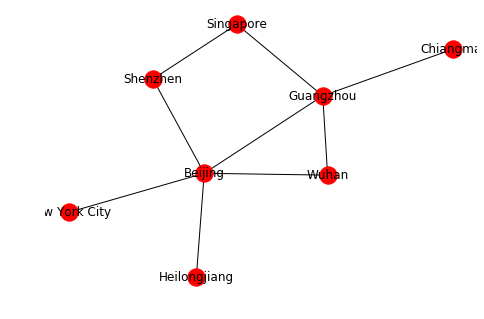

In [4]:
air_route = networkx.Graph(air_route)
networkx.draw(air_route,with_labels = True)

In [17]:
def search_targetPlace(start,target,graph):
    
    #相当于需要去访问的点
    
    seen = set()
    
    
    choosePaths = [[start]]
    
    pathes = [[start]]
    
    while pathes:
      
        #每次取出的是一个list,都是一直城市的路线类型(数组中最后面那个))
        current_place = pathes.pop(0)
        
        #取出路线中的最后一个地点
        frontier = current_place[-1]
        
        
        if  frontier in  seen:  continue
            
#             print ('{} already choosen'.format(current_place))
        
        # 最后一个地点作为ket值,然后取出可以飞到的地方,遍历,加到这个点所在各个数组
        for path in graph[frontier]:
            
            
            new_path = current_place + [path]
            
            #加入了新地点的,各个不同数组
            pathes.append(new_path)
            
            #取到的新地点是目标地点时候 返回
            if path == target : return new_path
            
        #不是目标地点,加到已经查看的集合中      
        seen.add(frontier)
        
    return choosePaths
        
    
    

In [23]:
print ( search_targetPlace(BJ,CM,air_route))

['Beijing', 'Guangzhou', 'Chiangmai']


In [21]:
def draw_route(cities): return ' ✈️ -> '.join(cities)

In [22]:
draw_route(search_targetPlace(SZ,CM,air_route))

'Shenzhen ✈️ -> Beijing ✈️ -> Guangzhou ✈️ -> Chiangmai'